# Week5 Multiple Linear Regression
## 背景描述  
汽车发动机在测功机上产生的**制动马力**被认为是**发动机转速**(每分钟转数，rpm)、**燃料的道路辛烷值**和**发动机压缩值**的函数，我们在实验室里进行实验，研究它们的函数关系。

## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）rpm | 发动机转速 | continuous variable | $\mathbb{R}^+$ |
| （自变量）Road_Octane_Number | 道路辛烷值 | continuous variable | $\mathbb{R}^+$ |
| （自变量）Compression | 压缩值 | continuous variable | $\mathbb{R}^+$ |
| （因变量）Brake_Horsepower | 制动马力 | continuous variable | $\mathbb{R}^+$ |

In [1]:
import pandas as pd
print('Data: \n', pd.read_csv('Project5.csv').values)

Data: 
 [[2000   90  100  225]
 [1800   94   95  212]
 [2400   88  110  229]
 [1900   91   96  222]
 [1600   86  100  219]
 [2500   96  110  278]
 [3000   94   98  246]
 [3200   90  100  237]
 [2800   88  105  233]
 [3400   86   97  224]
 [1800   90  100  223]
 [2500   89  104  230]]


## 问题
注：这里使用 $\alpha$=0.05 的显著性水平：

1. 请用统计模型描述制动马力和上述 3 个自变量之间的函数关系.
2. 请问Q1中所建立的模型是否合理.
3. 当发动机转速为3000转/min，道路辛烷值为90，发动机压缩值为100时，估计制动马力值的合理区间范围.

## 解决方案

**Q1:**  
使用多元线性回归的方法，令发动机转速为$X_1$，道路辛烷值为$X_2$，压缩值为$X_3$，制动马力为$Y$。则线性模型为：$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 +\epsilon$，并假定随机误差项符合正态分布。根据以上数据，可以求得$\hat{\beta_1},\hat{\beta_2},\hat{\beta_3}$及线性回归方程如下。

In [2]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

alpha = 0.05
p = 3
n = 12

x = pd.read_csv('Project5.csv')
x.insert(0, 'intercept', np.ones(len(x))) 
data = x.values * 1
df = pd.DataFrame(data, columns = ['intercept', 'P1', 'P2', 'P3', 'F'])
print(df)

# Do the multiple linear regression
model = ols('F ~ P1 + P2 + P3', df).fit()
beta = model.params
print('参数估计值: \n', round(beta, 4))
X = data[:, 0 : p + 1]
Y = data[:, -1]
Y_hat = model.fittedvalues
model.summary()



    intercept      P1    P2     P3      F
0         1.0  2000.0  90.0  100.0  225.0
1         1.0  1800.0  94.0   95.0  212.0
2         1.0  2400.0  88.0  110.0  229.0
3         1.0  1900.0  91.0   96.0  222.0
4         1.0  1600.0  86.0  100.0  219.0
5         1.0  2500.0  96.0  110.0  278.0
6         1.0  3000.0  94.0   98.0  246.0
7         1.0  3200.0  90.0  100.0  237.0
8         1.0  2800.0  88.0  105.0  233.0
9         1.0  3400.0  86.0   97.0  224.0
10        1.0  1800.0  90.0  100.0  223.0
11        1.0  2500.0  89.0  104.0  230.0
参数估计值: 
 Intercept   -266.0312
P1             0.0107
P2             3.1348
P3             1.8674
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      F   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Wed, 31 Mar 2021   Prob (F-statistic):            0.00317
Time:                        16:12:47   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -266.0312     92.674     -2.871      0.021    -479.737     -52.325
P1             0.0107      0.004      2.390      0.044       0.000       0.021
P2             3.1348      0.844      3.712      0.006       1.188       5.082
P3             1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                     9.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
# 输出多元线性回归方程
print('Y_hat = %.2f + (%.2f * X1) + (%.2f * X2) + (%.2f * X3)' % (beta[0], beta[1], beta[2], beta[3]))

Y_hat = -266.03 + (0.01 * X1) + (3.13 * X2) + (1.87 * X3)


**将数据中心化之后，求经验回归方程：**

In [4]:
# 求均值
X_mean = []
for k in range(p + 1):
    X_mean.append(np.mean(data[:, k]))  # 自变量 x 的均值
Y_mean = np.mean(data[:, -1])  # 因变量 y 的均值

# 数据中心化
X_cent = X - X_mean
Y_cent = Y - Y_mean

# Do the multiple linear regression
df = pd.DataFrame(X_cent, columns = ['intercept_cent', 'P1_cent', 'P2_cent', 'P3_cent'])
df['F_cent'] = Y_cent
model_cent = ols('F_cent ~ P1_cent + P2_cent + P3_cent', df).fit()
beta_cent = model_cent.params
print('参数估计值: \n', round(beta_cent, 4))
Y_hat_cent = model_cent.fittedvalues
model_cent.summary()

参数估计值: 
 Intercept   -0.0000
P1_cent      0.0107
P2_cent      3.1348
P3_cent      1.8674
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 F_cent   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Wed, 31 Mar 2021   Prob (F-statistic):            0.00317
Time:                        16:12:47   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.22e-16      2.544  -8.73e-17      1.000      -5.866       5.866
P1_cent        0.0107      0.004      2.390      0.044       0.000       0.021
P2_cent        3.1348      0.844      3.712      0.006       1.188       5.082
P3_cent        1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# 输出中心化后的多元线性回归方程
print('Y_hat_cent = %.2f + (%.2f * X1_cent) + (%.2f * X2_cent) + (%.2f * X3_cent)' % (beta_cent[0], beta_cent[1], beta_cent[2], beta_cent[3]))

Y_hat_cent = -0.00 + (0.01 * X1_cent) + (3.13 * X2_cent) + (1.87 * X3_cent)


通过对比数据中心化前后后的结果，我们可以发现，对数据进行中心化之后回归常数变为 0，而回归系数值未改变。

**Q2:**  

要验证模型是否合理，可以使用多元线性模型的显著性检验，可决系数的检验，以及残差检验等方法。

In [6]:
# 求解相关项
SSE = sum((Y - Y_hat) ** 2)
SST = sum((Y - Y_mean) ** 2)
SSR = sum((Y_hat - Y_mean) ** 2)

sigma2 = SSE / (n - p - 1)  # 方差
sigma = np.sqrt(sigma2)  # 标准差

c = np.dot(X.T, X)
C = np.linalg.inv(c)  # 求逆
# print(C)

**多元线性模型的显著性检验——F 检验:**  
检验假设：$H_0: \beta_1=\beta_2=\beta_3=0$ vs $H_1: \exists \beta_i \neq 0,i=1,2,3$

In [7]:
# 计算F0
F0 = (SSR / p) / (SSE / (n - p - 1))
# F0 = model.fvalue
print('F0: %.2f' % F0)
F = round(f.ppf(0.95, dfn = p, dfd = n - p - 1), 2)

# 法1：
pVal1 = f.sf(F0, p, n - p - 1)
# pVal1 = model.f_pvalue
print('pVal1: %.2f' % pVal1)
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 

# 法2：
if F0 > F:
    print('Since F0 > F(0.95, 3, 8) = %.2f, reject H0.' % F)
else:
    print('Accept H0.') 

F0: 11.12
pVal1: 0.00

Since p-value < 0.05, reject H0.
Since F0 > F(0.95, 3, 8) = 4.07, reject H0.


由 F 检验结果可知，该回归方程是显著的。

**多元线性模型的显著性检验——t 检验:**  
检验假设：$H_{0j}: \beta_j=0$ vs $H_{1j}: \beta_j \neq 0,j=1,2,3$

In [8]:
# t检验
t0 = []
for i in range(p + 1):   
    t0.append(beta[i] / (np.sqrt(C[i][i] * sigma2)))  # 求t值
# t0 = model.tvalues
print('t0值为：', np.round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - p - 1)
print('t的临界值为：%.4f' % tVal)
pVal2 = []
for i in range(p + 1):
    P = t.sf(abs(t0[i]), n - p - 1)
    pVal2.append(P)  # 已知临界值求p值
# pVal2 = model.pvalues / 2
print('P值为：', np.round(pVal2, 4))

print('\n')
# 法1：
for i in range(p):
    if pVal2[i + 1] < alpha:
        print ('Since p%d-value < 0.05, reject H0%d.' % (i + 1, i + 1))
    else:
        print('Accept H0%d.' % (i + 1))
print('\n')   

# 法2：
for i in range(p):
    if abs(t0[i + 1]) > tVal:
        print('Since t0%d > t(0.975, 8) = %.4f, reject H0%d' % (i + 1, tVal, i + 1))
    else:
        print('Accept H0%d.' % (i + 1)) 

t0值为： [-2.8706  2.3896  3.7123  3.4936]
t的临界值为：2.3060
P值为： [0.0104 0.0219 0.003  0.0041]


Since p1-value < 0.05, reject H01.
Since p2-value < 0.05, reject H02.
Since p3-value < 0.05, reject H03.


Since t01 > t(0.975, 8) = 2.3060, reject H01
Since t02 > t(0.975, 8) = 2.3060, reject H02
Since t03 > t(0.975, 8) = 2.3060, reject H03


由 t 检验结果可知，各回归系数都是显著的。

**复相关系数（可决系数）的检验:**

In [9]:
# 可决系数
R2 = SSR / SST
print('可决系数：%.4f' % R2)

# 调整可决系数
R2c = 1 - (SSE/(n-p-1)) / (SST/(n-1))
print('调整可决系数：%.4f' % R2c)

可决系数：0.8065
调整可决系数：0.7340


由于复相关系数（可决系数）值接近1，可以说明整体上 $X_1,X_2$ 与 $Y$ 呈线性关系。

综上所述，Q1中所建的多元线性回归模型是合理的。

**残差分析0: 计算制动马力的残差**

In [10]:
# 计算制动马力的残差
data_res = data * 1.0  # 乘1.0 不然会损失精度
for i in range(n):
    data_res[:, p + 1] = Y - Y_hat
df = pd.DataFrame(data_res, columns = ['intercept', 'P1', 'P2', 'P3', 'F_res'])
res = data_res[:, p + 1]
# res = model.resid
print(df.head())

   intercept      P1    P2     P3      F_res
0        1.0  2000.0  90.0  100.0   0.731289
1        1.0  1800.0  94.0   95.0 -13.328247
2        1.0  2400.0  88.0  110.0 -11.958476
3        1.0  1900.0  91.0   96.0   3.137442
4        1.0  1600.0  86.0  100.0  11.555798


**残差分析1: 残差的正态概率图**   
使用残差正态概率图可验证残差呈正态分布的假设。残差的正态概率图应该大致为一条直线。

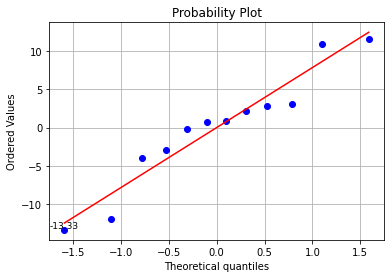

In [11]:
# 残差的正态概率图
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

In [12]:
# 异常值检验
MSE = SSE / (n - p - 1)
# MSE = model.mse_resid
d = np.abs(y) / np.sqrt(MSE)
if d < 3:
    print('残差', round(y, 2), '不是异常值.')
else:
    print('残差', round(y, 2), '是异常值')


残差 -13.33 不是异常值.


从残差的正态概率图可以看出，这些点大致在一条直线附近，说明数据近似服从正态分布。

**残差分析2: 残差与拟合值的关系图**   
使用残差与拟合值图可验证“残差随机分布”和“具有常量方差”的假设。理想情况下，点应当在 0 的两端随机分布（模型的拟合点应该平均散布在被拟合值点附近），点中无可辨识的模式。  
下表中的模式可能表示该模型不满足模型假设: 

| 模式 | 模式的含义 |
| :----------: | :--------: |
| 残差相对拟合值呈扇形或不均匀分散 | 异方差 |
| 曲线 | 缺少高阶项 |
| 远离 0 的点 | 异常值 |
| 在 X 方向远离其他点的点 | 有影响的点|

Text(0, 0.5, 'e_i')

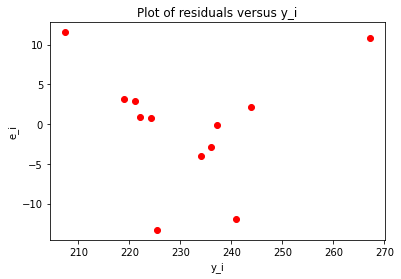

In [13]:
# 残差与拟合值的关系图
plt.scatter(Y_hat, res, c = 'red')
plt.title('Plot of residuals versus y_i')
plt.xlabel('y_i')
plt.ylabel('e_i')

从残差与拟合值的关系图中，无法拒绝方差齐性的假设。所以不能认为模型不合理，即认为模型合理。

【补充】方差分析可以看成特殊情况下的回归分析，方差分析就是解释变量全为分组的dummy（哑变量）的回归分析。  
参考网址：https://zhuanlan.zhihu.com/p/129043279  
方差齐性检验的本质：样本以及总体的方差分布是常数，和自变量或因变量没关系。    
线性回归里面我们一般用残差图来检验方差齐性，画散点图是为了弄清因变量和残差之间有没有关系。这里并不是说不同指标的方差不同，因为这里的自变量不像ANOVA中是可以人为控制的（分组-取值），这里的自变量是**观察**到的，如果我们没法取到每个 x 值所有对应的 y 值，就不能说对不同的指标方差不同，只是说观测值的方差不同（也只是一种探测）；我们这里只是用残差图去估计因变量的方差齐性（比较主观，看残差分布是否与拟合值没有明显的趋势关系）。  
当然我们并不能通过残差的分布来证明因变量的方差齐性，我们只是提出了“方差齐性”的假设，然后画出残差图，它杂乱无章，不相关，看起来是独立的，所以我们不能推翻这个假设，就认为观测值的方差是齐性的。  
参考网址：https://blog.csdn.net/weixin_33448555/article/details/112650361

**Q3:**

本题需要使用估计与预测的方法确定预测得到的制动马力。可以使用$E(y_0)$的估计或$y_0$的预测区间作为制动马力的大致区间。

**关于 $E(y_0)$ 的估计:**

In [14]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta0 = tVal * sigma * np.sqrt(x0.T @ C @ x0)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

x0 = [1]
for i in range(p):
    x0.append(int(input()))
print('给定 x = ', x0, ', E(y_0) 的置信区间：', np.round(confidence_interval(x0), 4))

3000
90
100
给定 x =  [1, 3000, 90, 100] , E(y_0) 的置信区间： [226.2457 243.7181]


**关于 $y_0$ 的预测:**

In [15]:
# 给定 x_0，求 y_0 的预测区间
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta1 = tVal * sigma * np.sqrt(1 + x0.T @ C @ x0)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int

x0_ = [1]
for i in range(p):
    x0_.append(int(input()))
print('给定 x = ', x0_, ', y_0 的预测区间：', np.round(confidence_interval(x0_), 4))

3000
90
100
给定 x =  [1, 3000, 90, 100] , y_0 的预测区间： [212.8622 257.1016]


由于计算公式不同，计算得到的$y_0$的预测区间要略宽于$E[y_0]$的置信区间。这里采用$y_0$的预测区间作为预测得到的制动马力，即$[212.86,\ 257.10]$。